# E-76 Obligated Federal Funds Data Exploration
### From the Division of Local Assistance 

E-76's or "Authorizations to Proceed" is a federal authorization of funds to establish the reimbursement date for a phase of work 

#### Data Sources: 
- https://dot.ca.gov/programs/local-assistance/reports/e-76-obligated

In this notebook, we will be looking to see what types of data is in the spreadsheet as well as begin to clean it for futher analysis


In [1]:
##one time load 
!pip install openpyxl

In [2]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup
import numpy as np

## Reading Excel as a data dictionary
Can use this approach, but recommend the next with second one. 

In [3]:
#obligated = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=['2014-2018', '2019', '2020', '2021'])


In [4]:
#print(obligated)

In [5]:
#print(type(obligated))

In [6]:
#len(obligated)

In [7]:
#print(type(obligated['2020']))

In [8]:
#obligated['2020'].info()

In [9]:
#obligated['2021'].info()

In [10]:
#obligated['2019'].info()

In [11]:
#obligated['2014-2018'].info()

In [12]:
#df1 = obligated['2014-2018']
#df2 = obligated['2019']
#df3 = obligated['2020']
#df4 = obligated['2021']

In [13]:
#pd_dct = {"pre2018": df1, "2019": df2, "2020":df3, "2021":df4}

In [14]:
#mdf = pd.concat(pd_dct, axis=0).reset_index(level=0).rename({'level_0':'key'}, axis=1)

In [15]:
#mdf

## Reading Excel with Concat

In [16]:
#attempt 2
## code source: https://pbpython.com/pandas-excel-tabs.html
df = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=None), ignore_index=True)


/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:68: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [17]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,9.0,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,...,7.0,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,6.0,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,...,0.0,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,...,0.0,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [18]:
df.tail()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
20016,Obligated,BRLO,5955(095),Orange County,2021-08-20 00:00:00,2021-08-27 00:00:00,2021-08-31 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,82000.0,...,16.0,ORA020501,"Silverado Canyon Road Over Silverado Creek, Ap...",Bridge Replacement (tc).,2,2021-08-20 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20017,Obligated,HSIPL,5073(093),Orange,2021-08-17 00:00:00,2021-08-27 00:00:00,2021-08-30 00:00:00,2021-08-30 00:00:00,2021-09-08 00:00:00,21000.0,...,9.0,SCAG015,Intersection Of Glassell St. & Palmyra Ave.,Install A New 2-phase Traffic Signal,2,2021-07-28 00:00:00,2021-08-26 00:00:00,SCAG,NaT,NaN
20018,Obligated,HSIPL,5073(078),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Glassell Street And Walnut Avenue,Protected Left-turn Signal Phasing,4,2021-08-13 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20019,Obligated,HSIPL,5073(080),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Chapman Avenue And James Street,Install Protected Left Turn Signal Phasing,4,2021-08-12 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20020,Obligated,CMSTPLN,6071(129),Orange County Transportation Authority,2021-08-23 00:00:00,2021-08-24 00:00:00,2021-08-31 00:00:00,2021-08-31 00:00:00,2021-09-09 00:00:00,8000000.0,...,9.0,ORA100511,State Route 55 From Interstate 405 To Intersta...,Add One Mixed-flow And High-occupancy Lane In ...,6,2021-06-01 00:00:00,2021-08-22 00:00:00,SCAG,NaT,NaN


In [19]:
print(len(df))

20021


In [20]:
df.sample(10)

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
10740,Obligated,ER,24M0(007),Inyo,2014-08-21,2014-09-22,2014-09-22,2014-09-25,2014-09-26,101000.00,...,1.0,NaN,Death Valley Rd. - Near Nunn Mt.,Emergency Opening,1,NaN,NaN,KCOG,NaN,NaN
2321,Obligated,BPMPL,5936(113),Santa Cruz County,2018-02-20,2018-02-20,2018-02-22,2018-02-26,2018-03-08,-37306.45,...,10.0,GP HBRR,Soquel Dr@rodeo Gulch 36c-0042,Bridge Preventative Maintinence,4,2018-02-16,2018-02-16,AMBAG,NaN,NaN
1903,Obligated,BRLO,5938(196),Stanislaus County,2018-01-18,2018-04-02,2018-04-09,2018-04-09,2018-04-18,1950000.00,...,9.0,STANCOG,Tegner Road Over Turlock Irrigation District (...,Bridge Replacement (tc),4,2017-12-28,2018-01-18,STANCOG,NaN,NaN
16751,Obligated,HSIPL,5149(021),La Verne,2020-06-04 00:00:00,2020-06-04 00:00:00,2020-06-04 00:00:00,2020-06-18 00:00:00,2020-06-29 00:00:00,0.00,...,11.0,SCAG015,Intersection Of Durward Way At White Avenue,"Install Signals, Lighting And Raised Medians",2,2020-05-11 00:00:00,2020-06-03 00:00:00,SCAG,NaN,NaN
333,Obligated,STPL,5955(097),Orange County,2018-10-17,2018-10-17,2018-10-17,2018-10-29,2018-11-02,-146032.19,...,4.0,ORA150102,Foothill Boulevard From Hewes Street To Newpor...,Road Rehabilitation,2,NaN,NaN,SCAG,NaN,NaN
7445,Obligated,STPL,6085(064),Sacramento Area Council Of Governments,2015-12-17,2016-01-28,2016-02-05,2016-02-10,2016-02-16,215967.00,...,6.0,VAR56101,Sacog Region,"Planning, Programming And Monitoring (rstp), 1...",1,NaN,NaN,SACOG,NaN,NaN
13671,Obligated,HSIPL,5060(355),Fresno,2019-03-11 00:00:00,2019-03-11 00:00:00,2019-03-11 00:00:00,2019-03-13 00:00:00,2019-03-19 00:00:00,66000.00,...,6.0,FRE040401,"Belmont Avenue From Delno To Clovis Avenues, O...",Installation Of Pedestrian Countdown Equipment...,1,2019-02-26 00:00:00,2019-02-26 00:00:00,CFCG,NaN,NaN
7476,Obligated,STPL,5012(123),Oakland,2015-10-06,2016-01-20,2016-01-25,2016-02-02,2016-02-09,9200000.00,...,7.0,ALA130024,"Lakeside Dr. From Madison St. To Harrison, Har...","Bike Pedestrian Improvement, Install Storm Dra...",1,NaN,NaN,MTC,NaN,NaN
12983,Obligated,CML,5044(069),Visalia,2013-12-20,2013-12-23,2014-01-02,2014-01-06,2014-01-06,-64301.51,...,0.0,TUL11-005,Christian Valley School Distric Coorporation (...,Purchase And Install 11 Particulate Matter Fil...,2,NaN,NaN,TCAG,NaN,NaN
1893,Obligated,STPL,5197(032),Sanger,2018-03-29,2018-04-03,2018-04-04,2018-04-05,2018-04-18,49500.00,...,13.0,FRE170004,Bethel Ave Between Annadale Ave. And Jensen Ave.,"Pavement Rehabilitation, Widen A Portion Of Ro...",2,2018-03-28,2018-03-28,CFCG,NaN,NaN


## Data Cleaning

In [21]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

Some Agencies are all caps, others are not. Applying str.title() to correct this. 

In [22]:
df.Agency = df.Agency.str.title()

In [23]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association Of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

In [24]:
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)

In [25]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [26]:
df['Waiting Days'].unique()

array([nan])

In [27]:
df.drop('Waiting Days', axis=1, inplace=True)

In [28]:
df['Today'].unique()

array([nan, '2020-01-01', '2019-06-06 9:00 am', '2021-01-04',
       Timestamp('2021-10-01 00:00:00'), NaT], dtype=object)

In [29]:
df.drop('Today', axis=1, inplace=True)

In [30]:
df.drop('Unnamed: 28', axis=1, inplace=True)

In [31]:
df.rename(columns={'Project NO': 'project_no',
                        'Fed requested': 'fed_requested',
                        'AC requested': 'ac_requested',
                        'total requested': 'total_requested',
                        'FTIP No': 'ftip_no',
                        'project location': 'project_location'}, inplace=True)

In [32]:
df.rename(columns={'prepared date': 'prepared_date',
                        'submit  to HQ date': 'submit_to_hq_date',
                        'HQ review date': 'hq_review_date',
                        'submit to FHWA date': 'submit_to_fhwa_date',
                        'To FMIS date': 'to_fmis_date',
                        'Status Comment': 'status_comment',
                        'dist processing Days': 'dist_processing_days',
                        'HQ processing Days': 'hq_processing_days',
                        'FHWA processing Days': 'fhwa_processing_days',
                        'Type of Work': 'type_of_work',
                        'Date Request Initiated': 'date_request_initiated',
                        'date completed request': 'date_completed_request'}, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                20021 non-null  object 
 1   PREFIX                  20021 non-null  object 
 2   project_no              20021 non-null  object 
 3   Agency                  20021 non-null  object 
 4   prepared_date           20011 non-null  object 
 5   submit_to_hq_date       20011 non-null  object 
 6   hq_review_date          20008 non-null  object 
 7   submit_to_fhwa_date     20012 non-null  object 
 8   to_fmis_date            20012 non-null  object 
 9   fed_requested           20020 non-null  float64
 10  ac_requested            20021 non-null  float64
 11  total_requested         20020 non-null  object 
 12  status_comment          20021 non-null  object 
 13  Locode                  18522 non-null  object 
 14  DIST                    20021 non-null

In [34]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '2748.3NA999'

In [35]:
df.loc[df['total_requested']=='2748.3NA999']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15547,Obligated,ER,38Y0(001),Los Angeles County,2019-11-12 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-19 00:00:00,1017276.52,-1019159.54,2748.3NA999,Authorized,5953,7,E-76 approved on,28.00,2.00,13.00,NaN,"Mulholland Hwy, Et Al Guardrail Replacement","Install Temporary Traffic Signs, Remove And Re...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


**Issue here**, and in the following row where 'NA' appears between numbers. Need to determine whether or not to manually override in the exel sheet. 

***Dropping rows with NA**

In [36]:
#https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value

delete_row = df[df["total_requested"]== '2748.3NA999'].index
df = df.drop(delete_row)

In [37]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '30169.98NA99'

In [38]:
df.loc[df['total_requested']=='30169.98NA99']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15548,Obligated,ER,38Y0(003),Los Angeles County,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-20 00:00:00,1033518.07,-1001297.90,30169.98NA99,Authorized,5953,7,E-76 approved on,8.00,22.00,14.00,NaN,Kanan Dume Rd From Mm 8.15 To Mm 11.75,"Install Temporary Traffic Signs, Remove & Repl...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


In [39]:
delete_row = df[df["total_requested"]== '30169.98NA99'].index
df = df.drop(delete_row)

In [40]:
df['total_requested'] = df['total_requested'].astype(float)

In [41]:
print(df['prepared_date'].dtypes)

object


In [42]:
df['prepared_date'].unique()

array(['2018-12-18', '2018-12-17', '2018-12-07', ...,
       Timestamp('2021-09-02 00:00:00'), Timestamp('2021-09-01 00:00:00'),
       Timestamp('2021-09-08 00:00:00')], dtype=object)

In [43]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit_to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [44]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [46]:
df[["ProjectID", "ProjectNO"]] = df["project_no"].str.split(pat="(", expand=True)


In [47]:
df.ProjectNO = [x.replace(")", "") for x in df.ProjectNO]

In [48]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214


## Locode and Project ID Columns 

Hypothesis:
    Project IDs and Locodes, or unique agency identifiers, are the same 
    
As it stands now, these columns have a mix of letters and numbers, making it hard to compare the two. 
In this block we will work to convert these columns, while trying to not convert the non-numeric numbers. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [50]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
9935,Obligated,BRLSZ,6248(031),Department Of Water Resources,2014-10-07,2015-01-16,2015-01-20,2015-01-22,2015-02-09,-863764.93,0.00,-975674.83,Authorized,6248.00,6,E-76 approved on E-76 approved on,101.00,6.00,18.00,FRE040501,15 Bridges Located In 3 Different Counties - S...,Seismic Retrofit,2,NaT,NaT,NON-MPO,6248,031
15002,Obligated,ER,32L0(462),Santa Barbara County,2019-10-22,2019-10-22,2019-10-23,2019-10-23,2019-10-31,350316.30,-350316.30,0.00,Authorized,5951,5,E-76 approved on,0.00,1.00,8.00,NaN,"San Marcos Road, 1.6 Miles North Of Cathedral ...","Reestablish Roadway, Shoulder And Drainage Fac...",3,2019-10-22,2019-10-22,SBCG,32L0,462
15074,Obligated,HSIPL,5203(048),Chula Vista,2019-08-01,2019-10-14,2019-10-15,2019-10-15,2019-10-24,757800.00,0.00,1416821.99,Authorized,5203,11,E-76 approved on,74.00,1.00,9.00,CAL105 /,Five Intersections: Broadway & Anita St; Third...,Provide For Protected Left Turn Movement At Tw...,2,2019-08-01,2019-08-02,SDAG,5203,048
16504,Obligated,BRLO,5917(083),Nevada County,2020-03-04,2020-04-24,2020-05-06,2020-05-18,2020-05-19,-58741.57,0.00,-58741.57,Authorized,5917,3,E-76 approved on,51.00,24.00,1.00,HBP_NEV,Purdon Road At Shady Creek ~0.15 Miles South E...,Replace 1 Lane Bridge With 2 Lane Bridge (tc),5,2020-03-04,2020-04-22,NON-MPO,5917,083
1838,Obligated,STPCML,6480(013),Alameda County Transportation Commission,2018-04-03,2018-04-17,2018-04-18,2018-04-19,2018-04-23,1309000.00,0.00,1482000.00,Authorized,6480.00,4,E-76 approved on,15.00,2.00,4.00,ALA110033,County Wide- Approximately 300 Public School,Alameda County Safe Routs To School Program Ou...,3,2018-04-02,2018-04-03,MTC,6480,013
3099,Obligated,STPL,5176(009),Ross,2017-10-10,2017-10-31,2017-11-07,2017-11-07,2017-11-13,0.00,0.00,167336.00,Authorized,5176.00,4,E-76 approved on,20.00,7.00,6.00,MRN130006,Bolinas Ave And Sir Francis Drake Boulevard In...,"Repave Roadway, Reconstruct Roadway Islands, R...",2,2017-10-02,2017-10-11,MTC,5176,009
2508,Obligated,ER,4400(046),Humboldt County,2015-10-12,2018-01-31,2018-02-15,2018-02-15,2018-02-16,1329549.14,0.00,1501805.00,Authorized,5904.00,1,E-76 approved on,881.00,15.00,1.00,NaN,Alderpoint Road Pm 40.21 To 40.70,Emergency Relief Pr Only,3,2015-09-03,2017-09-07,NON-MPO,4400,046
5878,Obligated,CML,5288(037),Folsom,2016-07-18,2016-07-19,2016-09-01,2016-09-01,2016-09-07,2127000.00,0.00,2999020.00,Authorized,5288.00,3,E-76 approved on Prepared on 9/29/2016,1.00,44.00,6.00,SAC24483,"In Folsom, Construct Class I Bike/ped Trail Fr...",Pedestrian And Bike Path (tc),1,NaT,NaT,SACOG,5288,037
478,Obligated,BRLS,5002(111),Sacramento,2018-10-02,2018-10-02,2018-10-02,2018-10-10,2018-10-15,-0.01,0.00,0.00,Authorized,5002.00,3,E-76 approved on,NaN,8.00,5.00,VAR79008,Norwood Ave At Arcade Creek Br. No. 24c-0080,Bridge Replacement,7,NaT,NaT,SACOG,5002,111
3571,Obligated,STPLZ,5004(040),San Diego,2017-09-07,2017-09-08,2017-09-08,2017-09-08,2017-09-12,-3943694.40,0.00,-3739745.60,Authorized,5004.00,11,E-76 approved on,1.00,0.00,4.00,NaN,10 Different Bridges(n.harbor Dr Br #57c0015),Seismic Retrofit,7,2017-09-07,2017-09-07,SDAG,5004,040


In [51]:
## dataset has a column NBIL, 32L0, 40A0, 5.92E+03, 38Y0, 38R0

## for now, leaving the errors. 

In [52]:
def get_num(x):
    try:
        return int(x)
    except Exception:
        try:
            return float(x)
        except Exception:
            return x

        
# https://stackoverflow.com/questions/56474599/how-to-ignore-errors-in-pandas-to-numeric-and-change-str-to-int

In [53]:
df['Locode'] = df['Locode'].apply(get_num)

In [54]:
df['ProjectID'] = df['ProjectID'].apply(get_num)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [56]:
compare_col = np.where(df["Locode"] == df["ProjectID"], True, False)
df["compare_id_locode"] = compare_col
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214,True


In [57]:
df['compare_id_locode'].value_counts()

True     16316
False     3703
Name: compare_id_locode, dtype: int64

In [58]:
group = df.groupby('Agency')
crosswalk_all = group.apply(lambda x: x['Locode'].unique())
print(crosswalk_all)

Agency
Access Services                                               [6312]
Agoura Hills                                             [5435, nan]
Alameda                                                       [5014]
Alameda - Contra Costa Transit District                       [6002]
Alameda Corridor Transportation Authority                     [6246]
                                                      ...           
Yrts                                                           [nan]
Yuba City                                                     [5163]
Yuba County                                                   [5916]
Yucaipa                                      [5457, nan, 5954, NBIL]
Yucca Valley                                             [5466, nan]
Length: 667, dtype: object


In [59]:
crosswalk_all.to_csv('crosswalk_all.csv')

In [60]:
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

nan_rows = df[df['Locode'].isnull()]

In [61]:
nan_rows.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
9821,Obligated,RPSTPL,5410(073),Irvine,2015-02-17,2015-02-17,2015-02-17,2015-02-17,2015-03-01,0.00,0.00,0.40,Authorized,NaN,12,E-76 approved on E-76 approved on,0.00,0.00,12.00,ORA990906,Campus Drive From California Avenue To Culver ...,Class I Bikeway,3,NaT,NaT,SCAG,5410,073,False
8610,Obligated,HSIPL,5957(119),San Diego,2015-07-01,2015-07-14,2015-07-24,2015-07-27,2015-07-31,23706.00,0.00,23706.00,Authorized,NaN,11,E-76 approved on E-76 approved on,13.00,13.00,4.00,CAL 105,Winter Gardens Boulevard @ Winter Gardens Drive,Traffic Signal And Interconnect (tc),2,NaT,NaT,SCAG,5957,119,False
11832,Obligated,CML,5241(050),Ceres,2014-05-15,2014-05-15,2014-05-21,2014-05-29,2014-05-30,56305.00,0.00,63600.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,14.00,1.00,VA03,Mitchel Rd/tid Main From Roeding Rd To Service Rd,Bike/ped Path,1,NaT,NaT,SJCOG,5241,050,False
8157,Obligated,RPSTPL,5955(074),Orange,2015-10-22,2015-10-22,2015-10-22,2015-10-22,2015-10-28,-0.23,0.00,219090.80,Authorized,NaN,12,E-76 approved on E-76 approved on,0.00,0.00,6.00,ORA990906,San Juan Creek From Camino Las Ramblas To Dohe...,Bike Trail Safety Improvements,3,NaT,NaT,MCTC,5955,074,False
9349,Obligated,CMLN,6054(058),Riv Co Trans Co,2015-03-25,2015-03-27,2015-04-27,2015-04-28,2015-05-02,-6197099.00,0.00,NaN,Authorized,NaN,8,E-76 approved on E-76 approved on,2.00,32.00,4.00,NaN,State Route 91 From Adams Street To The 60/91/...,Hov Lanes,3,NaT,NaT,SCAG,6054,058,False
10618,Obligated,CML,5134(016),Imperial,2014-10-23,2014-10-23,2014-10-23,2014-10-23,2014-10-23,-60000.00,0.00,-68000.00,Authorized,NaN,11,E-76 approved on E-76 approved on,0.00,0.00,0.00,IMP120621,City Of Imperial Mechanical Maintenance Yard,Construction Of Slow Fill Cng Station,2,NaT,NaT,SCAG,5134,016,False
12350,Obligated,SRTSL,5149(016),La Verne,2014-03-26,2014-03-26,2014-03-26,2014-03-26,2014-03-28,-753.71,0.00,1105.15,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,0.00,2.00,SCAG016,"In La Verne, Around K-12 Schools",Install Pedestrian Countdown Signals,4,NaT,NaT,SANDAG,5149,016,False
9341,Obligated,BRLSZD,5956(124),Riverside,2015-04-30,2015-04-30,2015-04-30,2015-04-30,2015-05-03,-118689.23,0.00,4372570.88,Authorized,NaN,8,E-76 approved on E-76 approved on,0.00,0.00,3.00,NaN,Van Buren Boulevard Over The Santa Ana River,Bridge Replacement,7,NaT,NaT,SCAG,5956,124,False
12701,Obligated,RPSTPL,5165(051),Turlock,2014-02-11,2014-02-11,2014-02-21,2014-02-21,2014-02-21,-67355.00,0.00,-76255.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,10.00,0.00,NaN,Golden State Blvd Between Christoffersen Pkwy ...,Landscape Median,3,NaT,NaT,SANDAG,5165,051,False
11422,Obligated,STPL,5165(074),Turlock,2014-06-27,2014-06-27,2014-07-07,2014-07-09,2014-07-10,719497.00,0.00,1188068.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,12.00,1.00,VA02,Hawkeye Avenue - Dels Lane To Olive Avenue,Rehabilitation,1,NaT,NaT,MCAG,5165,074,False


In [62]:
print(len(nan_rows))

1499


In [63]:
#checking to see if these NaN values are also in the downloadable data. 

In [64]:
# There are the same number of NaNs (1499) on the excel sheet. 
# So without these, there are still 2,206 

## Comparing columns and Summarizing Data
A preliminary exploration of the data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [66]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
17104,Obligated,ER,38F0(003),Mendocino County,2020-08-12,2020-08-13,2020-08-21,2020-09-08,2020-09-11,35519.65,0.00,40122.00,Authorized,5910,1,E-76 approved on,2.00,26.00,3.00,NaN,"East Road, Cr 230, Redwood Valley",Permanent Restoration,2,2020-08-11,2020-08-12,NON-MPO,38F0,003,False
19364,Obligated,STPL,5208(173),Clovis,2021-06-02,2021-06-02,2021-06-07,2021-06-08,2021-06-10,832181.99,0.00,940000.00,Authorized,5208,6,E-76 approved on,6.00,6.00,2.00,FRE130064,Clovis Avenue From Nees To Alluvial,"Street Rehabilitation, Including Curb, Signal,...",2,2021-05-27,2021-06-01,CFCG,5208,173,True
17716,Obligated,BRLO,5061(007),Calistoga,2019-08-21,2020-10-14,2020-11-24,2020-12-21,2020-12-23,296005.71,0.00,297526.71,Authorized,5061,4,E-76 approved on,9.00,68.00,2.00,VAR170012,Berry Street Over Napa River (br 21c0115),Bridge Replacement (tc),6,2020-10-05,2020-10-14,MTC,5061,007,True
5691,Obligated,HSIPL,5927(101),Marin County,2016-10-12,2016-10-12,2016-10-12,2016-10-12,2016-10-20,-5332.40,0.00,33319.09,Authorized,5927,4,E-76 approved on Prepared on 10/6/2015,0.00,0.00,8.00,VAR110007,East Sir Francis Drake Blvd. -- Mp 0.55 To Mp ...,Install Guardrail And Radar Speed Feedback,3,NaT,NaT,MTC,5927,101,True
5110,Obligated,HSIPL,6328(068),"City & County Of San Francisco, Mta/Parking & ...",2017-01-23,2017-01-23,2017-01-24,2017-01-24,2017-01-31,0.00,0.00,192521.00,Authorized,6328,4,E-76 approved on Prepared on 11/22/2016,0.00,1.00,7.00,VAR110007,"Polk Street, Between Post And Union Streets - ...",Signal Mods And Curb Ramps (tc),3,NaT,NaT,MTC,6328,068,True
17392,Obligated,HSIPL,5322(057),Fremont,2020-09-02,2020-09-30,2020-09-30,2020-10-06,2020-10-09,0.00,0.00,-600807.00,Authorized,5322,4,E-76 approved on,49.00,6.00,3.00,VAR170002,Intersection Of Fremont Blvd./ Mowry Ave. And ...,Intersection Improvements. Install Eight Pedes...,3,2020-08-12,2020-09-02,MTC,5322,057,True
15471,Obligated,ER,32L0(104),Santa Cruz County,2019-11-21,2019-11-21,2019-11-21,2019-11-22,2019-12-17,82411.00,-82411.00,0.00,Authorized,5936,5,E-76 approved on,0.00,1.00,25.00,NaN,Casserly Rd Pm 3.39,Repair Drain And Pavement,3,2019-11-21,2019-11-21,AMBAG,32L0,104,False
12024,Obligated,STPL,5942(216),Fresno County,2014-04-18,2014-04-21,2014-04-24,2014-04-28,2014-04-29,800148.00,0.00,946287.00,Authorized,5942,6,E-76 approved on E-76 approved on,3.00,7.00,1.00,FRE110615,Jensen Ave. From Golden State Blvd. To Maple Ave.,"Ac Overlay, Curb& Gutter, Loop Detectors",3,NaT,NaT,CFCG,5942,216,True
12332,Obligated,BRLZ,5322(019),Fremont,2014-03-18,2014-03-19,2014-03-28,2014-03-28,2014-04-01,9313356.00,0.00,10556045.00,Authorized,5322,4,E-76 approved on E-76 approved on,1.00,9.00,4.00,VAR110045,"Niles Blvd.overhead(bart/uprr),br#33c0128",Bridge Replacement,5,NaT,NaT,MTC,5322,019,True
10303,Obligated,STPL,5129(085),Oxnard,2014-12-11,2014-12-11,2014-12-16,2014-12-19,2014-12-23,0.00,0.00,260328.00,Authorized,5129,7,E-76 approved on E-76 approved on,0.00,8.00,4.00,VEN54032,Rose Ave. From Fifth Street To The South Side ...,"Pavement Resurfacing, Concrete Repairs, Slurry",2,NaT,NaT,SCAG,5129,085,True


In [67]:
from siuba.data import cars_sql
from siuba import group_by, mutate, show_query

In [68]:
df[_.compare_id_locode == False]

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
21,Obligated,ACSTP,32L0(510),Butte County,2018-12-17,2018-12-20,2018-12-20,2018-12-20,2018-12-21,0.00,2986207.00,3367920.00,Authorized,5912,3,E-76 approved on,43.00,0.00,1.00,NaN,Oroville Quincy Hwy: Location #1 100 Yards Ab...,Emergency Opening And Restoration Of Roadway S...,1,2018-11-07,2018-11-07,BCAG,32L0,510,False
24,Obligated,ER,26E0(001),Napa County,2018-12-18,2018-12-18,2018-12-20,2018-12-20,2018-12-21,941474.00,0.00,1026469.00,Authorized,5921,4,E-76 approved on,13.00,2.00,1.00,NaN,Daf 1: Oak Knoll Ave (mpm 0.20); Daf 2: Oak Kn...,Napa County Earthquake Repair - Pavement Resto...,4,2018-11-30,2018-12-05,MTC,26.00,001,False
54,Obligated,ER,29P0(001),Carlsbad,2018-12-13,2018-12-13,2018-12-13,2018-12-14,2018-12-18,-61058.59,0.00,-53619.67,Authorized,5308,11,E-76 approved on,NaN,1.00,4.00,NaN,"Carlsbad Boulevard, North Of Las Encinas Creek",Emergency Revetment,2,NaT,NaT,SDAG,29P0,001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,Obligated,ACSTP,40A0(076),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,263019.00,283856.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Farrell Drive At Tahquitz Creek Wash (tc/mcc G...,"Removal Of Mud, Organic Debris, Pavement, Curb...",1,2021-08-09,2021-08-09,SCAG,40A0,076,False
19962,Obligated,ACSTP,40A0(077),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,61835.50,65509.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Golf Club Road At Tahquitz Creek Golf Course C...,"Removal Of Mud And Debris, Set Up Traffic Cont...",1,2021-08-09,2021-08-09,SCAG,40A0,077,False
19970,Obligated,BR,NBIL(514),Rancho Mirage,2020-12-07,2021-08-31,2021-09-01,2021-09-03,2021-09-16,442650.00,0.00,500000.00,Authorized,5412,8,E-76 approved on,8.00,3.00,13.00,RIV050201,Frank Sinatra Drive Across The Whitewater Rive...,Replace 4-lane Low Water Crossing With 4-lane ...,4,2021-08-23,2021-08-23,SCAG,NBIL,514,False
20000,Obligated,BR,NBIL(516),Calaveras,2021-08-18,2021-08-18,2021-08-30,2021-09-03,2021-09-14,50000.00,0.00,50000.00,Authorized,5463,10,E-76 approved on,6.00,16.00,11.00,HBPLOCAL,Hogan Dam Road Over Bear Creek (lwc 00l0042),Low Water Crossing Replacement (tc),5,2021-08-12,2021-08-18,SCAG,NBIL,516,False


In [69]:
df['status_comment'].value_counts()

Authorized        19468
Prog Code Z400      147
Prog Code M400       73
Prog Code Z230       60
Prog Code Z003       40
Prog Code M40E       33
Prog Code M0E3       22
Prog Code M23E       17
Prog Code RPS9       14
Prog Code Z40E       14
Prog Code M230       14
Prog Code Z301       14
Prog Code M240       13
Prog Code L23E       10
Prog Code L40E        9
Prog Code Z240        9
Prog Code M003        8
Prog Code L230        6
Prog Code Z23E        6
prog code Z230        3
Prog Code L240        3
Prog Code L400        3
Prog Code L23R        3
Prog Code Z24E        3
Prog Code Q230        2
prog code Z240        2
Prog Code H230        2
Prog Code 33C0        2
Prog Code Z0E3        2
Prog Code M950        2
Prog Code Z300        2
Prog Code M301        2
Prog Code Z950        1
Prog Code M95E        1
Prog Code L24E        1
Prog Code RPS0        1
Prog Code M3E1        1
prog code Z24E        1
prog code             1
prog code Z400        1
Prog Code M30E        1
Prog Code Z233  

In [70]:
df['Location'].value_counts()

Obligated          19468
FTA Transferred      543
DISTRICT               5
HQ                     3
Name: Location, dtype: int64

In [71]:
df['type_of_work'].nunique()

6768

In [72]:
df['PREFIX'].nunique()

388

In [73]:
prefix = df['PREFIX'].value_counts()

In [74]:
prefix.head()

CML      3290
HSIPL    3245
STPL     2763
ER       1566
BRLO     1390
Name: PREFIX, dtype: int64

In [92]:
prefix.tail()

VPPL       19
VPPP        3
VPPPL       5
VPPTCS      1
WZDXL20     1
Name: PREFIX, dtype: int64

In [93]:
prefix.sample(10)

LPPSB1L      5
GRNHSE       2
ATPSTPL      5
HP21CM       2
STPLHSR      2
RPCML        2
STPE         1
ITS13        1
PLHDL08      4
RPSTPL     575
Name: PREFIX, dtype: int64

In [75]:
print((prefix == 1).sum())

113


In [76]:
prefix.sort_index(inplace=True)
prefix

6140000      2
ACNHPI       2
ACST-ER    233
ACSTP      303
ASCTP        1
          ... 
VPPL        19
VPPP         3
VPPPL        5
VPPTCS       1
WZDXL20      1
Name: PREFIX, Length: 388, dtype: int64

In [77]:
#Getting a CSV to create a detailed crosswalk with defintions. 
prefix.to_csv('count_grant_types.csv')

In [78]:
df[["dist_processing_days", "hq_processing_days", "fhwa_processing_days"]].describe()

,dist_processing_days,hq_processing_days,fhwa_processing_days
count,18307.00,20011.00,20011.00
mean,20.59,11.56,5.84
std,56.82,20.63,6.11
min,-216.00,0.00,-29.00
25%,0.00,0.00,2.00
50%,4.00,5.00,5.00
75%,15.00,14.00,8.00
max,1519.00,500.00,204.00


In [79]:
df[["fed_requested", "ac_requested", "total_requested"]].describe()

,fed_requested,ac_requested,total_requested
count,20018.00,20019.00,20018.00
mean,651399.64,45575.71,966230.58
std,4532551.93,3693922.24,16025962.24
min,-30000000.00,-168216336.00,-201391000.00
25%,0.00,0.00,0.00
50%,0.00,0.00,40000.00
75%,275000.00,0.00,369396.00
max,165000000.00,247009753.00,1900000000.00


In [80]:
df.agg({"fed_requested": ["min", "max", "median", "mean", "sum"], 
        "ac_requested": ["min", "max", "median", "mean", "sum"],
        "total_requested": ["min", "max", "median", "mean", "sum"]})

,fed_requested,ac_requested,total_requested
min,-30000000.00,-168216336.00,-201391000.00
max,165000000.00,247009753.00,1900000000.00
median,0.00,0.00,40000.00
mean,651399.64,45575.71,966230.58
sum,13039718011.88,912380058.35,19342003670.50


In [81]:
sumstat_mpo = df.groupby("MPO")[["fed_requested", "ac_requested", "total_requested"]].mean()

In [82]:
sumstat_mpo.head()

,fed_requested,ac_requested,total_requested
MPO,,,
AMBAG,218905.90,-1389.02,275096.99
BCAG,291881.70,100074.01,479992.11
CFCG,197973.78,7567.69,281513.40
COFCG,-139340.01,-1549.85,-310856.10
ER NONE,27414.77,0.00,142412.88


<AxesSubplot:xlabel='MPO'>

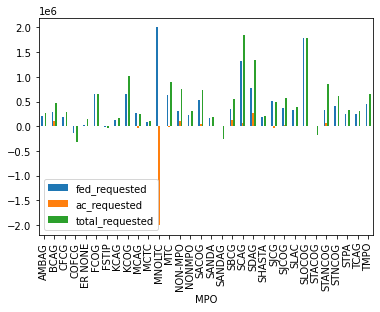

In [94]:
#quick plot to see large picture distribution of funds 
sumstat_mpo.plot.bar()

In [90]:
df.groupby("Agency")[["fed_requested", "ac_requested", "total_requested"]].mean().sort_values('total_requested')

,fed_requested,ac_requested,total_requested
Agency,,,
Alameda Corridor Transportation Authority,-1392639.96,0.00,-15818321.18
Santa Fe Springs,-0.53,0.00,-14714709.09
Rancho Cucamonga,-0.01,0.00,-3123124.48
Pomona,181144.84,0.00,-3112261.01
Grass Valley,56029.29,19262.99,-790810.52
...,...,...,...
Los Angeles County Metropolitan Transportation Authority,11704368.14,0.00,16981834.29
Riverside County Transportation Commission,9303768.53,131649.56,20643806.25
Orange County Transportation Authority,24325731.79,671278.96,29371595.76


## Convert to CSV for future analysis 

In [91]:
df.to_csv('clean.csv')